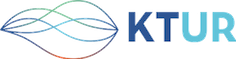

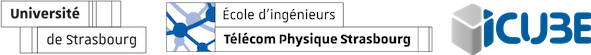

# Fully-connected neural network for the regression

The task will be to build a neural network for regression that will predict the price of the house in a certain area.  

## Loading data

Load California housing dataset for regression.

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

See the content of the dataset.

In [ ]:
housing

See the description of the dataset

In [ ]:
print(housing.DESCR)

Create a Pandas dataframe for the input data

In [ ]:
import pandas as pd
X = pd.DataFrame(housing.data, columns=housing.feature_names)
X.head()

Create another Pandas dataframe for the ground-truth data. The ground-truth data represents median house value in 100,000s of dollars. This is what we should try to predict based on the given information on the houses.

In [ ]:
y = pd.DataFrame(housing.target, columns=housing.target_names)
y.head()

Check the size of the dataset

In [ ]:
X.shape

Leave aside 20% of the data as a test set.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

## Building a model

TODO - Create and compile the same model as in the previous exercise (normalised input, 4 hidden layers with 5 neurons and ReLU activation, output layer with 1 neuron). What to do with the activation for the last layer? 
Use mean squared error as a loss function. We don't need any metrics, loss will be enough. 

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Normalization, Input
from tensorflow.keras.callbacks import TensorBoard
import numpy as np

# normalise with mean 0 and standard deviation 1
normalizer = Normalization(axis=-1)
normalizer.adapt(np.array(X_train))

# define model
model = Sequential()

# TODO - Add your code here
model.add(Input(shape=(X_train.shape[1],)))
model.add(normalizer)
model.add(Dense(5, activation="relu"))
model.add(Dense(5, activation="relu"))
model.add(Dense(5, activation="relu"))
model.add(Dense(5, activation="relu"))
# Linear activation
model.add(Dense(1))
model.summary()

# compile the model
model.compile(optimizer='adam', loss='mse')

TensorBoard

In [ ]:
# prepare callback
tb = TensorBoard(histogram_freq=1)

In [ ]:
# Load the TensorBoard notebook extension
%reload_ext tensorboard

TODO - Train the model for 50 epochs with batch size 32. Leave 20% of the data as the validation set. Pass TensorBoard callback.

In [ ]:
# TODO - Add your code here
# fit the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.2, callbacks=[tb])

Inspect the reults.

In [ ]:
%tensorboard --logdir logs

TODO - Evaluate

In [ ]:
# TODO - Add your code here
error = model.evaluate(X_test, y_test, verbose=1)
print('MSE: %.3f, RMSE: %.3f' % (error, np.sqrt(error)))

TODO - Calculate the predictions for the whole test dataset.

In [ ]:
# TODO - Add your code here
y_pred = model.predict(X_test)

Compare predicted results and ground truth for the first 5 samples.

In [ ]:
print(y_pred[0:5])
print(y_test[0:5])

Compare ground truth and the predictions visually. When plotted together in a scatter plot, if the regression model is good, the plot should be close to the straight line.

In [ ]:
from matplotlib import pyplot as plt
n = 200
plt.scatter(y_test[:n], y_pred[:n])